<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

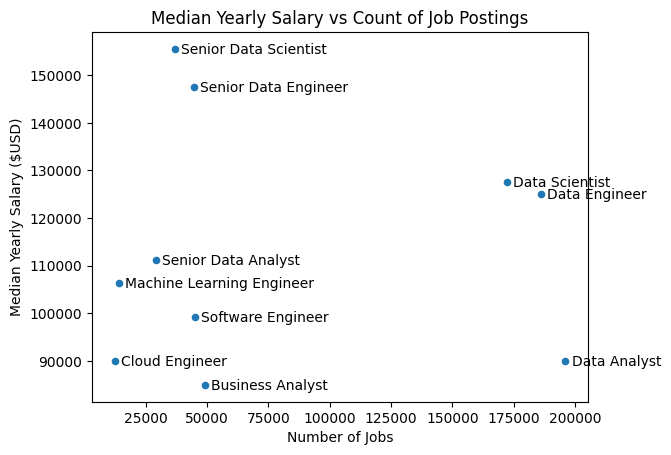

In [148]:
job_stats = df.groupby('job_title_short').agg(
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_title_short', 'count')
)

job_stats.plot(kind='scatter', x='job_count', y='median_salary')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

for i, txt in enumerate(job_stats.index):
    plt.text(job_stats['job_count'].iloc[i] + 2500, job_stats['median_salary'].iloc[i] -1000, txt)
    
plt.show() 


---

## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

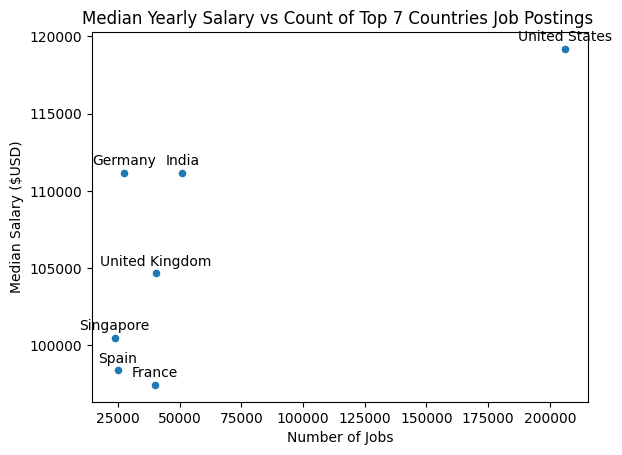

In [149]:
top_7_countries = df['job_country'].value_counts().head(7).index

countries_stats = df[df['job_country'].isin(top_7_countries)].groupby('job_country').agg(
    job_count = ('job_country', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

countries_stats.plot(kind='scatter', x='job_count', y='median_salary')
plt.title('Median Yearly Salary vs Count of Top 7 Countries Job Postings ')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Salary ($USD)')

for i in range(len(countries_stats)):
    plt.text(countries_stats['job_count'].iloc[i], countries_stats['median_salary'].iloc[i] + 500, countries_stats.index[i], ha='center')
    
plt.show()


---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

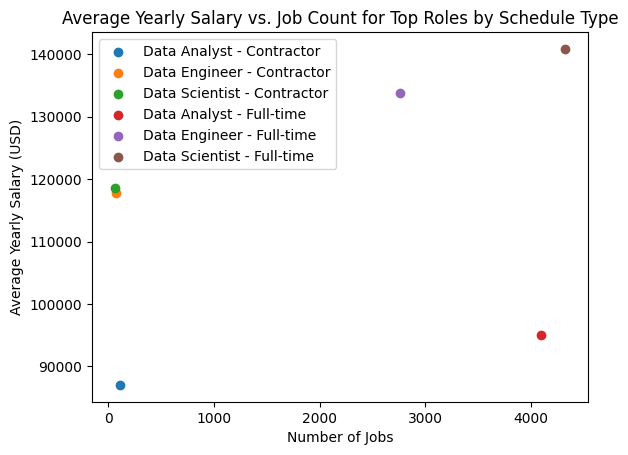

In [ ]:
# Code Needed
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_filtered = df[
    (df['job_title_short'].isin(target_job_titles)) &               #Only job titles from target_job_titles list
    (df['job_country'] == 'United States') &                        #Only jobs offers from United States
    (df['job_schedule_type'].isin(['Full-time', 'Contractor']) &    #Only Full-time and Constractor schedule type
    (df['salary_year_avg'].notna())                                 #Filter out Missing Values from salary_year_avg col
)].copy()

jobs_stats = df_filtered.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count') 
)

jobs_stats.reset_index(inplace=True)

# jobs_stats['job_title_type'] = jobs_stats.apply(lambda row: [row['job_title_short'], row['job_schedule_type']], axis=1)

job_stats.reset_index(inplace=True)

job_stats['job_title_type'] = job_stats['job_title_short'] + ' - ' + job_stats['job_schedule_type']
job_stats['job_title_type']

for job_title_type in (job_stats['job_title_type'].unique()):
    subset = job_stats[job_stats['job_title_type'] == job_title_type]
    plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()    

---